# 重参化(Reparameterization)的作用

By Ru-Yuan Zhang
Translated and derived from [LINK](http://gokererdogan.github.io/2016/07/01/reparameterization-trick/)

在Kingma 和 Welling（2014 年）关于VAE的原文中，提到了重参数化(Reparameterization)技巧。重参数化

假设我们有一个正态分布 $q$，其参数为 $\theta$，具体为 $q_{\theta}(x) = N(\theta,1)$。我们想解决以下问题
$$
\text{min}_{\theta} \quad E_q[x^2]
$$
这当然是一个相当愚蠢的问题，而且最优的 $\theta$ 是显而易见的。我们想了解重参数化技巧如何帮助计算目标 $E_q[x^2]$ 的梯度。

计算 $\nabla_{\theta} E_q[x^2]$ 的一种方法如下
$$
\nabla_{\theta} E_q[x^2] = \nabla_{\theta} \int q_{\theta}(x) x^2 dx = \int x^2 \nabla_{\theta} q_{\theta}(x) \frac{q_{\theta}(x)}{q_{\theta}(x)} dx = \int q_{\theta}(x) \nabla_{\theta} \log q_{\theta}(x) x^2 dx = E_q[x^2 \nabla_{\theta} \log q_{\theta}(x)]
$$

在我们的例子中，$q_{\theta}(x) = N(\theta,1)$，这种方法得出
$$
\nabla_{\theta} E_q[x^2] = E_q[x^2 (x-\theta)]
$$

重参数化技巧是一种重写期望的方法，这样我们求期望的分布就与参数 $\theta$ 无关了。为此，我们需要使 $q$ 中的随机因素与 $\theta$ 无关。因此，我们把 $x$ 写成
$$
x = \theta + \epsilon, \quad \epsilon \sim N(0,1)
$$
然后，我们可以写出 
$$
E_q[x^2] = E_p[(\theta+\epsilon)^2]
$$ 
其中 $p$ 是 $\epsilon$ 的分布，即 $N(0,1)$。现在，我们可以把 $E_q[x^2]$ 的导数写如下
$$
\nabla_{\theta} E_q[x^2] = \nabla_{\theta} E_p[(\theta+\epsilon)^2] = E_p[2(\theta+\epsilon)]。
$$

现在，让我们比较一下这两种方法的方差；我们希望看到，第一种方法的方差较大，而重新参数化技巧则大大降低了方差。

In [2]:
import numpy as np
N = 1000
theta = 2.0
eps = np.random.randn(N)
x = theta + eps

grad1 = lambda x: np.sum(np.square(x)*(x-theta)) / x.size
grad2 = lambda eps: np.sum(2*(theta + eps)) / x.size

print(grad1(x))
print(grad2(eps))

4.123032608893911
4.0690527003813735


让我们绘制不同样本量的方差。

In [3]:
Ns = [10, 100, 1000, 10000, 100000]
reps = 100

means1 = np.zeros(len(Ns))
vars1 = np.zeros(len(Ns))
means2 = np.zeros(len(Ns))
vars2 = np.zeros(len(Ns))

est1 = np.zeros(reps)
est2 = np.zeros(reps)
for i, N in enumerate(Ns):
    for r in range(reps):
        x = np.random.randn(N) + theta
        est1[r] = grad1(x)
        eps = np.random.randn(N)
        est2[r] = grad2(eps)
    means1[i] = np.mean(est1)
    means2[i] = np.mean(est2)
    vars1[i] = np.var(est1)
    vars2[i] = np.var(est2)
    
print(means1)
print(means2)
print('\n')
print(vars1)
print(vars2)

[4.17122868 3.87558084 4.01226787 4.00891375 3.99965225]
[4.07831224 4.00082622 4.0002942  4.00003672 3.9999935 ]


[9.00639146e+00 8.62340828e-01 7.14688062e-02 8.08338655e-03
 9.57645160e-04]
[4.01040381e-01 4.23572088e-02 4.16290247e-03 4.51501426e-04
 4.45516975e-05]


Text(0, 0.5, 'Gradient Variance')

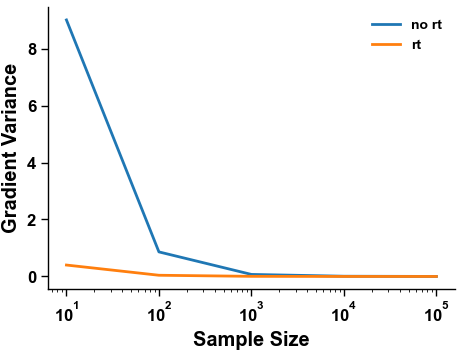

In [6]:
import matplotlib.pyplot as plt

plt.plot(Ns, vars1)
plt.plot(Ns, vars2)
plt.legend(['no rt', 'rt'])
plt.xlabel('Sample Size')
plt.xscale('log')
plt.ylabel('Gradient Variance')

Variance of the estimates using reparameterization trick is one order of magnitude smaller than the estimates from the first method!